<a href="https://colab.research.google.com/github/vferman2000/Springboard/blob/master/InitialDataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Fashion Image Classification Project
The objective of the project is to build a Convolutional Neural Network model to classify fashion product images using TensorFow and Keras functional API. The model will then predict the class of a given input image.

The dataset can be downloaded from https://www.kaggle.com/paramaggarwal/fashion-product-images-dataset

The platform selected for the project is Google Collab.

This is the initial data exploration.

In [1]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

from google.colab import drive 
drive.mount('/mntDrive')  

In [2]:
# importing additional libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import os

In [3]:
# Path to dataset in Google drive

DATASET_PATH = "/content/drive/My Drive/Springboard Data Science/CapstoneTwo/fashion-product-images-small/myntradataset/"
print(os.listdir(DATASET_PATH))


['images', 'styles.csv']


In [4]:
#Creating a Pandas DataFrame with styles.csv
#Some rows have an extra column in their productDisplayName which will be ommitted.

df_styles = pd.read_csv(DATASET_PATH + 'styles.csv', usecols = lambda column : column not in range(11))


df_styles DataFrame

In [5]:
print("There are", len(df_styles),"items in df_styles")
df_styles.head()

There are 44446 items in df_styles


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


#masterCategory column is selected as target class

In [7]:
# Column selected as target class

df_styles.masterCategory.value_counts()

Apparel           21400
Accessories       11289
Footwear           9222
Personal Care      2404
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

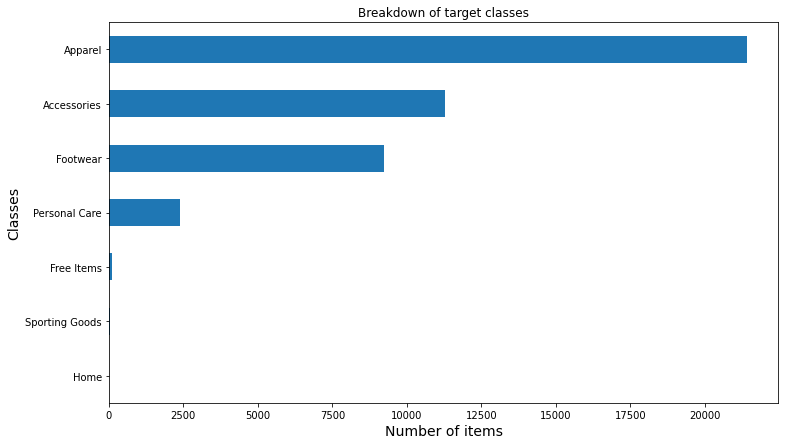

In [28]:
plt.figure(figsize=(12,7))
plt.title("Breakdown of target classes")
plt.ylabel("Classes", fontsize=14)
plt.xlabel("Number of items", fontsize=14)
plt.xticks()
plt.yticks()
df_styles.masterCategory.value_counts().sort_values().plot(kind='barh')

#A new column 'image' is created to map jpg images

In [8]:
#new column 'image'

df_styles['image'] = df_styles.apply(lambda row: str(row['id']) + ".jpg", axis=1)


df_styles['masterCategory'] = df_styles.masterCategory.apply(lambda row: 'NA' if row is np.nan else row)
df_styles = df_styles.reset_index(drop=True)
print(len(df_styles))
df_styles.head(10)

44446


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


#Example of images in dataset

In [15]:
images_data = DATASET_PATH+"images/"

In [23]:
import cv2
def plot_figures(figures, nrows = 2, ncols=3):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return images_data+img

def load_image(img):
    img     = cv2.imread(img_path(img))
    return img


(80, 60, 3)


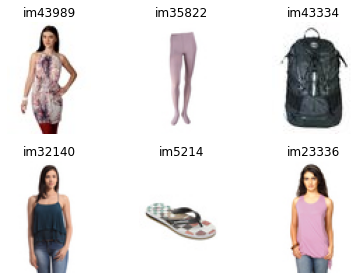

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df_train.sample(6).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
print(load_image(df_train.iloc[0].image).shape)
plot_figures(figures, 2, 3)

In [25]:
print(load_image(df_train.iloc[0].image))

[[[188 193 196]
  [188 193 196]
  [188 193 196]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]

 [[188 193 196]
  [188 193 196]
  [188 193 196]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]

 [[188 193 196]
  [188 193 196]
  [188 193 196]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]

 ...

 [[185 190 193]
  [185 190 193]
  [185 190 193]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]

 [[184 189 192]
  [184 189 192]
  [184 189 192]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]

 [[184 189 192]
  [184 189 192]
  [184 189 192]
  ...
  [188 193 196]
  [188 193 196]
  [188 193 196]]]


In [26]:
masterCategory_classes = df_train.iloc[:,2].unique()
print(masterCategory_classes)
print(len(masterCategory_classes))

['Footwear' 'Apparel' 'Accessories' 'Personal Care' 'Free Items'
 'Sporting Goods']
6
